In [117]:
import matplotlib.pyplot as plt
import numpy as np
import openpyxl

### Scrape spectral data

In [118]:
dframe = openpyxl.load_workbook("Mineral spectra with ASD v2.xlsx")

In [119]:
endMemMap = {}

for tendMem in dframe.sheetnames :    
    endMem = tendMem.lower()
    
    if tendMem not in endMemMap :
        endMemMap[endMem] = {}
        endMemMap[endMem]["ASD wavelength"]  = []
        endMemMap[endMem]["ASD reflectance"] = []
    
    for row in dframe[tendMem].iter_rows(2,dframe[tendMem].max_row):
        endMemMap[endMem]["ASD wavelength"]  += [row[0].value]
        endMemMap[endMem]["ASD reflectance"] += [row[1].value]

In [120]:
dframe = openpyxl.load_workbook("Mineral spectra with BECK v2.xlsx")

In [121]:
for tendMem in dframe.sheetnames :
    endMem = tendMem.lower()

    if tendMem not in endMemMap :
        endMemMap[endMem] = {}
        endMemMap[endMem]["BECK wavelength"]  = []
        endMemMap[endMem]["BECK reflectance"] = []
        
    if "ASD wavelength" in endMemMap[endMem] :
        print("\t - ",tendMem," has both BECK and ASD spectra.")
        
    for row in dframe[tendMem].iter_rows(2,dframe[tendMem].max_row):
        endMemMap[endMem]["BECK wavelength"]  += [row[0].value]
        endMemMap[endMem]["BECK reflectance"] += [row[1].value]

In [122]:
dframe    = openpyxl.load_workbook("Mineral spectra with stated peaks v2.xlsx")
asdNames  = "Calcite,Gibbsite,Goethite,Kaolinite,Montmorillonite".split(',')
beckNames = "Ammonio-Smectite,Hematite,Illite".split(',')

In [123]:
for tendMem in dframe.sheetnames :
    endMem = tendMem.lower()
    
    ttype = "ASD"
    if tendMem in beckNames :
        ttype = "BECK"
            
    if tendMem not in endMemMap :
        endMemMap[endMem] = {}
        endMemMap[endMem][ttype+" wavelength"]  = []
        endMemMap[endMem][ttype+" reflectance"] = []
    
    if "ASD wavelength" in endMemMap[endMem] and "BECK wavelength" in endMemMap[endMem] :
        print("\t - ",tendMem," has both BECK and ASD spectra.")
        
    for row in dframe[tendMem].iter_rows(2,dframe[tendMem].max_row):
        endMemMap[endMem][ttype+" wavelength"]  += [row[0].value]
        endMemMap[endMem][ttype+" reflectance"] += [row[1].value]

In [124]:
dframe = openpyxl.load_workbook("ICLRDataset_EndmemberSpectra.xlsx")

In [125]:
for tendMem in dframe.sheetnames :    
    endMem = tendMem.lower()

    if endMem not in endMemMap :
        print("\t - ",tendMem," is not already in endMemMap.")
        endMemMap[endMem] = {}
    
    endMemMap[endMem]["second wavelength"]  = []
    endMemMap[endMem]["second reflectance"] = []
    
    for row in dframe[tendMem].iter_rows(2,dframe[tendMem].max_row):
        endMemMap[endMem]["second wavelength"]  += [row[0].value]
        endMemMap[endMem]["second reflectance"] += [row[1].value]

	 -  Iron Oxide  is not already in endMemMap.
	 -  Olivine  is not already in endMemMap.
	 -  Cerianite  is not already in endMemMap.
	 -  Cuprite  is not already in endMemMap.
	 -  Hydroxylapatite  is not already in endMemMap.
	 -  Iron Sulfide  is not already in endMemMap.
	 -  Niter  is not already in endMemMap.
	 -  Eskolaite  is not already in endMemMap.
	 -  Polyhalite  is not already in endMemMap.
	 -  Nahcolite  is not already in endMemMap.


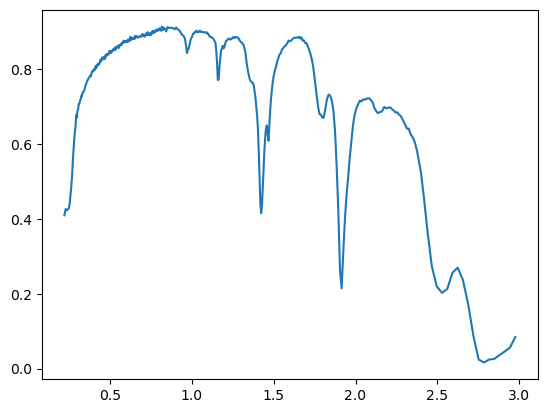

In [126]:
plt.plot(endMemMap["analcime"]["BECK wavelength"],endMemMap["analcime"]["BECK reflectance"])

### Scrape size, density, and other data

In [127]:
dframe = openpyxl.load_workbook("Soil endmember mastersheet v2.xlsx", data_only=True)

Get chemical formula data, absorption peaks, and USGS reference information:

In [128]:
for row in dframe["USGS_spectra"].iter_rows(2,dframe["USGS_spectra"].max_row):
    if row[2].value is None : continue
    tendMem = row[2].value
    endMem = tendMem.lower()
    
    if endMem not in endMemMap :
        print("\t - Key not in endmember map:",endMem)
        continue
        
    endMemMap[endMem]["Chemical formula"] = row[3].value
    endMemMap[endMem]["Absorption peaks (nm)"] = row[4].value
    endMemMap[endMem]["USGS Library Spectrum Title"] = row[6].value
    endMemMap[endMem]["USGS Notes"] = row[8].value

Get mineral information:

In [129]:
for row in dframe["Minerals"].iter_rows(2,dframe["Minerals"].max_row):
    if row[1].value is None : continue
    tendMem = row[1].value
    endMem = tendMem.lower()
    
    if row[7].value != "TRUE" : continue
    
    if endMem not in endMemMap :
        print("\t - Mineral has USGS spectrum but is not in endmember map:",endMem)
        endMemMap[endMem] = {}
        
    if "Chemical formula" not in endMemMap[endMem] :
        endMemMap[endMem]["Chemical formula"] = row[2].value
    endMemMap[endMem]["Mineral class"] = row[3].value
    if row[4].value is not None :
        endMemMap[endMem]["Silicate class"] = row[4].value
    if row[5].value is not None :
        endMemMap[endMem]["Silicate mineral subclass"] = row[5].value
    endMemMap[endMem]["Mineral absorption peaks (nm)"] = row[8].value
    endMemMap[endMem]["Mineral absorption widths (nm)"] = row[9].value
    endMemMap[endMem]["Minerals Notes"] = row[15].value

Get mass densities and radii:

In [130]:
for row in dframe["density_radius"].iter_rows(2,dframe["density_radius"].max_row):
    if row[2].value is None : continue
    tendMem = row[2].value
    endMem = tendMem.lower()
        
    # for now, skip if not in the USGS spectrum list
    if endMem not in endMemMap : 
        #print("\t - Skipping mineral:",endMem)
        continue
    
    trho = row[7].value
    tvol = row[12].value
    
    if trho is None :
        if row[8].value is not None :
            trho = row[8].value
        elif row[9].value is not None :
            trho = row[9].value
        else :
            print("\t - Mineral has no density data:",endMem)
        
    if tvol is None :
        if row[10].value is not None :
            tvol = row[10].value
        else :
            print("\t - Mineral has no radius data:",endMem)

    
    # calculate actual density from table entry
    if isinstance(trho,float) : 
        rho = trho 
    elif trho is None : 
        rho = None
    else : np.mean(np.array([float(x) for x in trho.split('-')]))
    
    # calculate actual radius from table entry
    if isinstance(tvol,float) : 
        rad = (3./4. / np.pi * tvol) ** (1./3.)
    elif tvol is None :
        rad = None
    else :
        print("\t - Radius calculation for",endMem,"attempts to use lattice parameters.")
        rad = None
    
    # save data
    endMemMap[endMem]["Density (Mg/m^3)"] = rho
    endMemMap[endMem]["Effective Radius (nm)"] = rad

	 - Radius calculation for hydromagnesite attempts to use lattice parameters.
	 - Radius calculation for bassanite attempts to use lattice parameters.


Get average mass abundances.

In [131]:
for row in dframe["withspectra_composition_by_mass"].iter_rows(2,dframe["withspectra_composition_by_mass"].max_row):
    tendMem = row[2].value
    if tendMem is None : continue
    endMem = tendMem.lower()
    tComp = row[7].value
        
    # for now, ski  p if not in the USGS spectrum list
    if endMem not in endMemMap : 
        print("\t - Mineral",endMem," is not in the endmember map!")
        continue
        
    # save data
    endMemMap[endMem]["Coarse measure of average abundance"] = 0.0 if tComp is None else tComp
    

#### Compute molecular mass, carbon content

In [132]:
endMemMap["calcite"]["Chemical formula"] = "CaCO3"

endMemMap["calcite"]["Carbon % by mass"] = 0.12
endMemMap["hydromagnesite"]["Carbon % by mass"] = 0.1027
endMemMap["dolomite"]["Carbon % by mass"] = 0.1303
endMemMap["siderite"]["Carbon % by mass"] = 0.1037
endMemMap["aragonite"]["Carbon % by mass"] = 0.12
endMemMap["magnesite"]["Carbon % by mass"] = 0.1425
endMemMap["trona"]["Carbon % by mass"] = 0.1063

for x in endMemMap.keys() :
    endMemMap[x]["Carbon % by mass"] = 0.0 if "Carbon % by mass" not in endMemMap[x] else endMemMap[x]["Carbon % by mass"]

#### Add in cross-spectra general information

In [133]:
endMemMap["General"] = {}
endMemMap["General"]["Postprocessed Wavelength Axis [nm]"] = [x for x in range(350,2501)]

#### Check that the axes are not too different within measurement classes

0.34999999 2.5


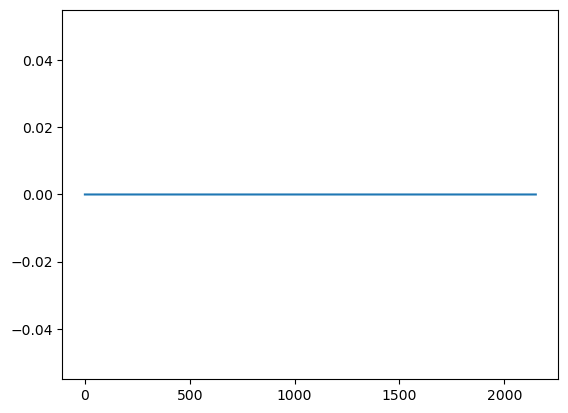

In [134]:
bla=[endMemMap[x]["ASD wavelength"] if "ASD wavelength" in endMemMap[x] and x != "General" else None for x in endMemMap.keys()]
bla=[x for x in bla if x is not None]
bla=np.array(bla)
plt.plot(np.max(bla,axis=0) - np.min(bla,axis=0))
print(np.min(bla),np.max(bla))

0.2051 2.9760001


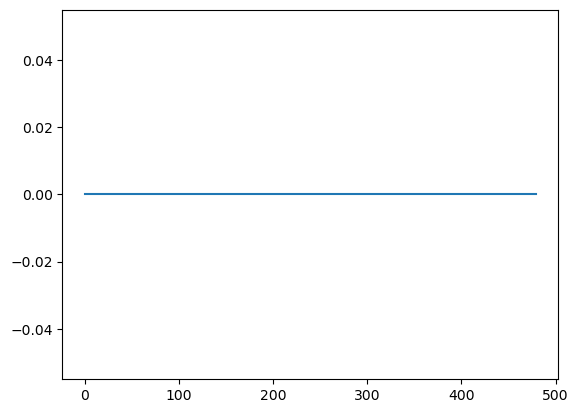

In [135]:
bla=[endMemMap[x]["BECK wavelength"] if "BECK wavelength" in endMemMap[x] and x !="General" else None for x in endMemMap.keys()]
bla=[x for x in bla if x is not None]
bla=np.array(bla)
plt.plot(np.max(bla,axis=0) - np.min(bla,axis=0))
print(np.min(bla),np.max(bla))

### Postprocess ASD and BECK spectra to be on the same XF

In [136]:
def postProcessSpectrum(xin,xout,refin) :
    return np.interp(xout, xin, refin)

for endMem in endMemMap :
    if endMem == "General" : continue
    
    ttype = ""
    if "ASD wavelength" in endMemMap[endMem] :
        ttype = "ASD"
    elif "BECK wavelength" in endMemMap[endMem] :
        ttype = "BECK"
    else :
        ttype = "second"
            
    wavelengths = np.array(endMemMap[endMem][ttype+" wavelength"])
    reflectance = np.array(endMemMap[endMem][ttype+" reflectance"])
    
    newwave = np.array([wavelengths[i] for i in range(len(wavelengths)) if reflectance[i] is not None])
    newref  = np.array([reflectance[i] for i in range(len(reflectance)) if reflectance[i] is not None])
    
    XF = np.array([x for x in range(350,2501)])
    
    endMemMap[endMem]["Postprocessed Reflectance"] = postProcessSpectrum(newwave*1000.0,XF,newref).tolist()

    if (ttype == "ASD" or ttype == "BECK") and "second wavelength" in endMemMap[endMem] :
        print("\t - ",endMem," has duplicate reflectance profile.")
        wavelengths = np.array(endMemMap[endMem]["second wavelength"])
        reflectance = np.array(endMemMap[endMem]["second reflectance"])
        
        newwave = np.array([wavelengths[i] for i in range(len(wavelengths)) if reflectance[i] is not None])
        newref  = np.array([reflectance[i] for i in range(len(reflectance)) if reflectance[i] is not None])
        
        XF = np.array([x for x in range(350,2501)])
        
        endMemMap[endMem]["Postprocessed Reflectance v2"] = postProcessSpectrum(newwave*1000.0,XF,newref).tolist()

	 -  pyrolusite  has duplicate reflectance profile.
	 -  fluorapatite  has duplicate reflectance profile.
	 -  halloysite  has duplicate reflectance profile.
	 -  actinolite  has duplicate reflectance profile.
	 -  albite  has duplicate reflectance profile.
	 -  anorthite  has duplicate reflectance profile.
	 -  beryl  has duplicate reflectance profile.
	 -  chlorite  has duplicate reflectance profile.
	 -  chrysotile  has duplicate reflectance profile.
	 -  corundum  has duplicate reflectance profile.
	 -  cummingtonite  has duplicate reflectance profile.
	 -  diaspore  has duplicate reflectance profile.
	 -  diopside  has duplicate reflectance profile.
	 -  dolomite  has duplicate reflectance profile.
	 -  epidote  has duplicate reflectance profile.
	 -  forsterite  has duplicate reflectance profile.
	 -  gypsum  has duplicate reflectance profile.
	 -  halite  has duplicate reflectance profile.
	 -  hedenbergite  has duplicate reflectance profile.
	 -  hornblende  has duplicate refle

### Summarize changes to mastersheets and export JSON

Changes made to soil endmember mastersheet:

- density_radius: "chlorites -> chlorite"
- density_radius: "hematite/haematite -> hematite"
- density_radius: "smectite -> ammonio-smectite"
- density_radius: "hydroxyapatite -> hydroxyl-apatite"
- density_radius: "chloroapatite -> chlorapatite"
- USGS_spectra: "chlorites -> chlorite"
- USGS_spectra: "chloroapatite -> chlorapatite"
- USGS_spectra: "hydroxyapatite -> hydroxyl-apatite"
- USGS_spectra: "fluoroapatite -> fluorapatite"

In ASD spectra: 

- Duplicate "Magnesite+Hydromag" and turn into two sheets, "Magnesite" and "Hydromagnesite"

### Plot spectra

	 - Plotting second spectrum for pyrolusite
	 - Plotting second spectrum for fluorapatite
	 - Plotting second spectrum for halloysite
	 - Plotting second spectrum for actinolite
	 - Plotting second spectrum for albite
	 - Plotting second spectrum for anorthite
	 - Plotting second spectrum for beryl
	 - Plotting second spectrum for chlorite
	 - Plotting second spectrum for chrysotile
	 - Plotting second spectrum for corundum
	 - Plotting second spectrum for cummingtonite
	 - Plotting second spectrum for diaspore
	 - Plotting second spectrum for diopside
	 - Plotting second spectrum for dolomite
	 - Plotting second spectrum for epidote
	 - Plotting second spectrum for forsterite
	 - Plotting second spectrum for gypsum
	 - Plotting second spectrum for halite
	 - Plotting second spectrum for hedenbergite
	 - Plotting second spectrum for hornblende
	 - Plotting second spectrum for ilmenite
	 - Plotting second spectrum for magnetite
	 - Plotting second spectrum for muscovite
	 - Plotting sec

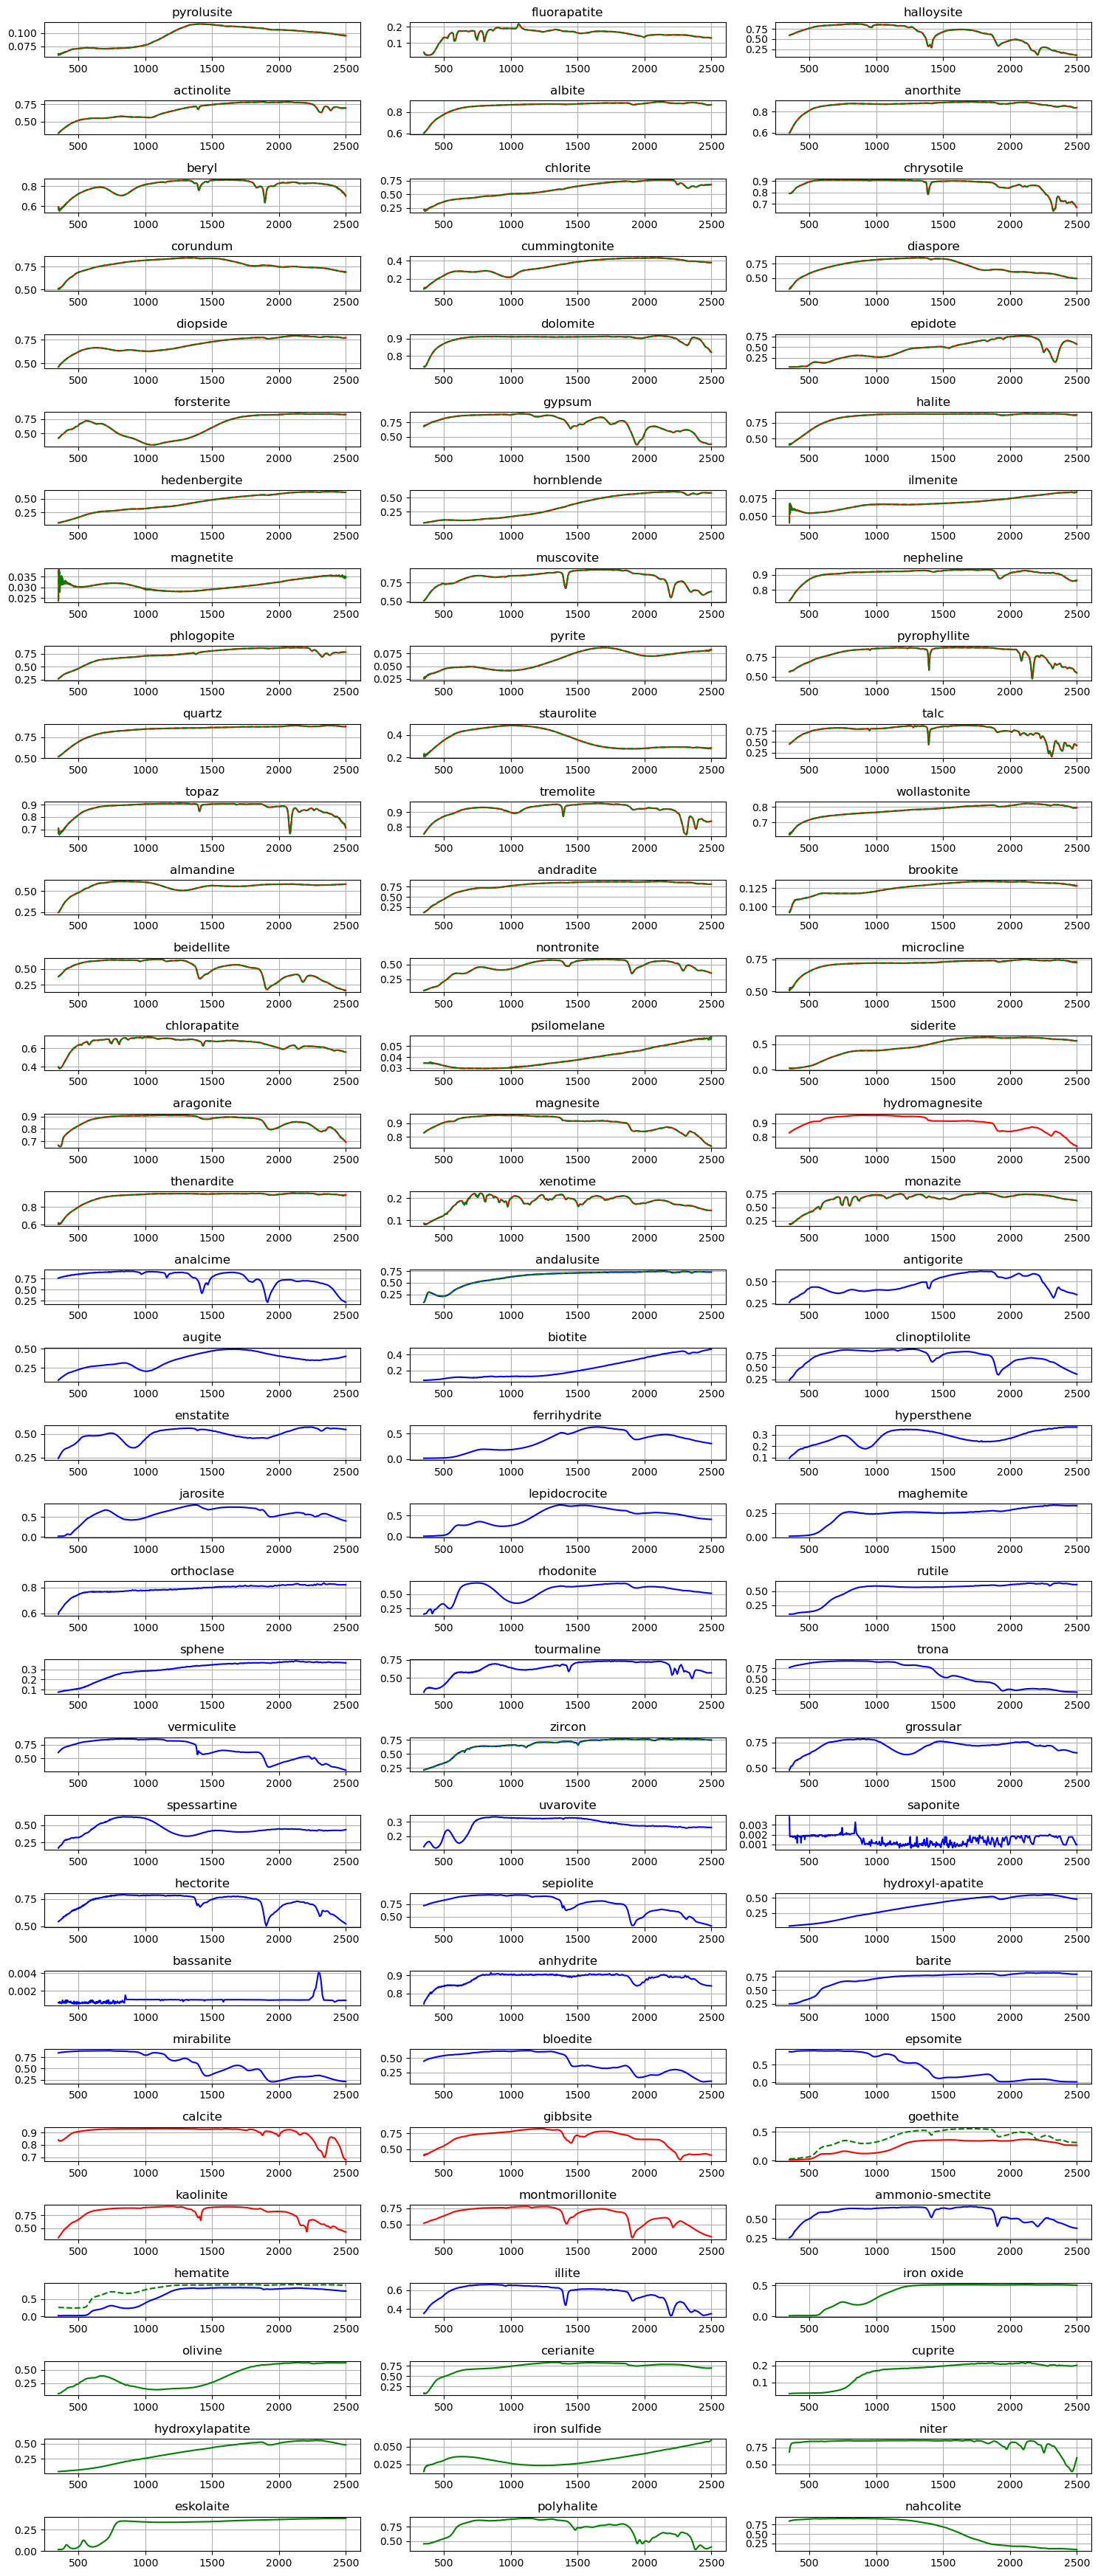

In [138]:
f, axarr = plt.subplots(int(np.ceil((len(endMemMap.keys())-1)/3.)),3,figsize=(15,35))

curr_row = 0
index = 0

for endMem in endMemMap.keys():
    if endMem == "General" : continue

    if "ASD wavelength" in endMemMap[endMem] :
        ttype="ASD"
        clr = "r"
    elif "BECK wavelength" in endMemMap[endMem] : 
        ttype = "BECK"
        clr = "b"
    else :
        ttype="second"
        clr = "g"
    
        
    #a = plt.plot(endMemMap[endMem][ttype+" wavelength"],endMemMap[endMem][ttype+" reflectance"])

    # find the column by taking the current index modulo 3
    col = index % 3
    # plot on relevant subplot
    axarr[curr_row,col].plot(endMemMap["General"]["Postprocessed Wavelength Axis [nm]"],endMemMap[endMem]["Postprocessed Reflectance"],clr)
    if "Postprocessed Reflectance v2" in endMemMap[endMem] :
        print ("\t - Plotting second spectrum for",endMem)
        axarr[curr_row,col].plot(endMemMap["General"]["Postprocessed Wavelength Axis [nm]"],endMemMap[endMem]["Postprocessed Reflectance v2"],'g--')
    axarr[curr_row,col].set_title(endMem)
    axarr[curr_row,col].grid()
    
        
    # we have finished the current row, so increment row counter
    if col == 2 :
        curr_row += 1
    index +=1
    
    
f.tight_layout()
plt.show()

In [139]:
# Delete erroneous / non-mineral entries from the dict 'endMemMap'.
# Also delete entries which cannot be associated to a single mineral form.
endMemMap.pop('saponite', None) # saponite spectrum is unreasonably noisy
endMemMap.pop('bassanite', None) # bassanite spectrum is unreasonably noisy
endMemMap.pop('hydromagnesite', None) # hydromagnesite is identical to magnesite
endMemMap.pop('hydroxyl-apatite', None) # hydroxyl-apatite is duplicated
endMemMap.pop('iron sulfide', None) # iron sulfide is not a mineral
endMemMap.pop('iron oxide', None) # iron oxide is not a mineral
endMemMap.pop('olivine', None) # olivine is a mineral group, not a single mineral, and we have forsterite from that group

endMemMap[endMem]["Postprocessed Reflectance"] = endMemMap["goethite"]["Postprocessed Reflectance v2"]
endMemMap[endMem]["Postprocessed Reflectance"] = endMemMap["hematite"]["Postprocessed Reflectance v2"]

endMemMap["General"]["Postprocessed Wavelength Axis [nm]"] = endMemMap["General"]["Postprocessed Wavelength Axis [nm]"][15:]

for endMem in endMemMap.keys() :
    endMemMap[endMem]["Postprocessed Reflectance"] = endMemMap[endMem]["Postprocessed Reflectance"][15:]

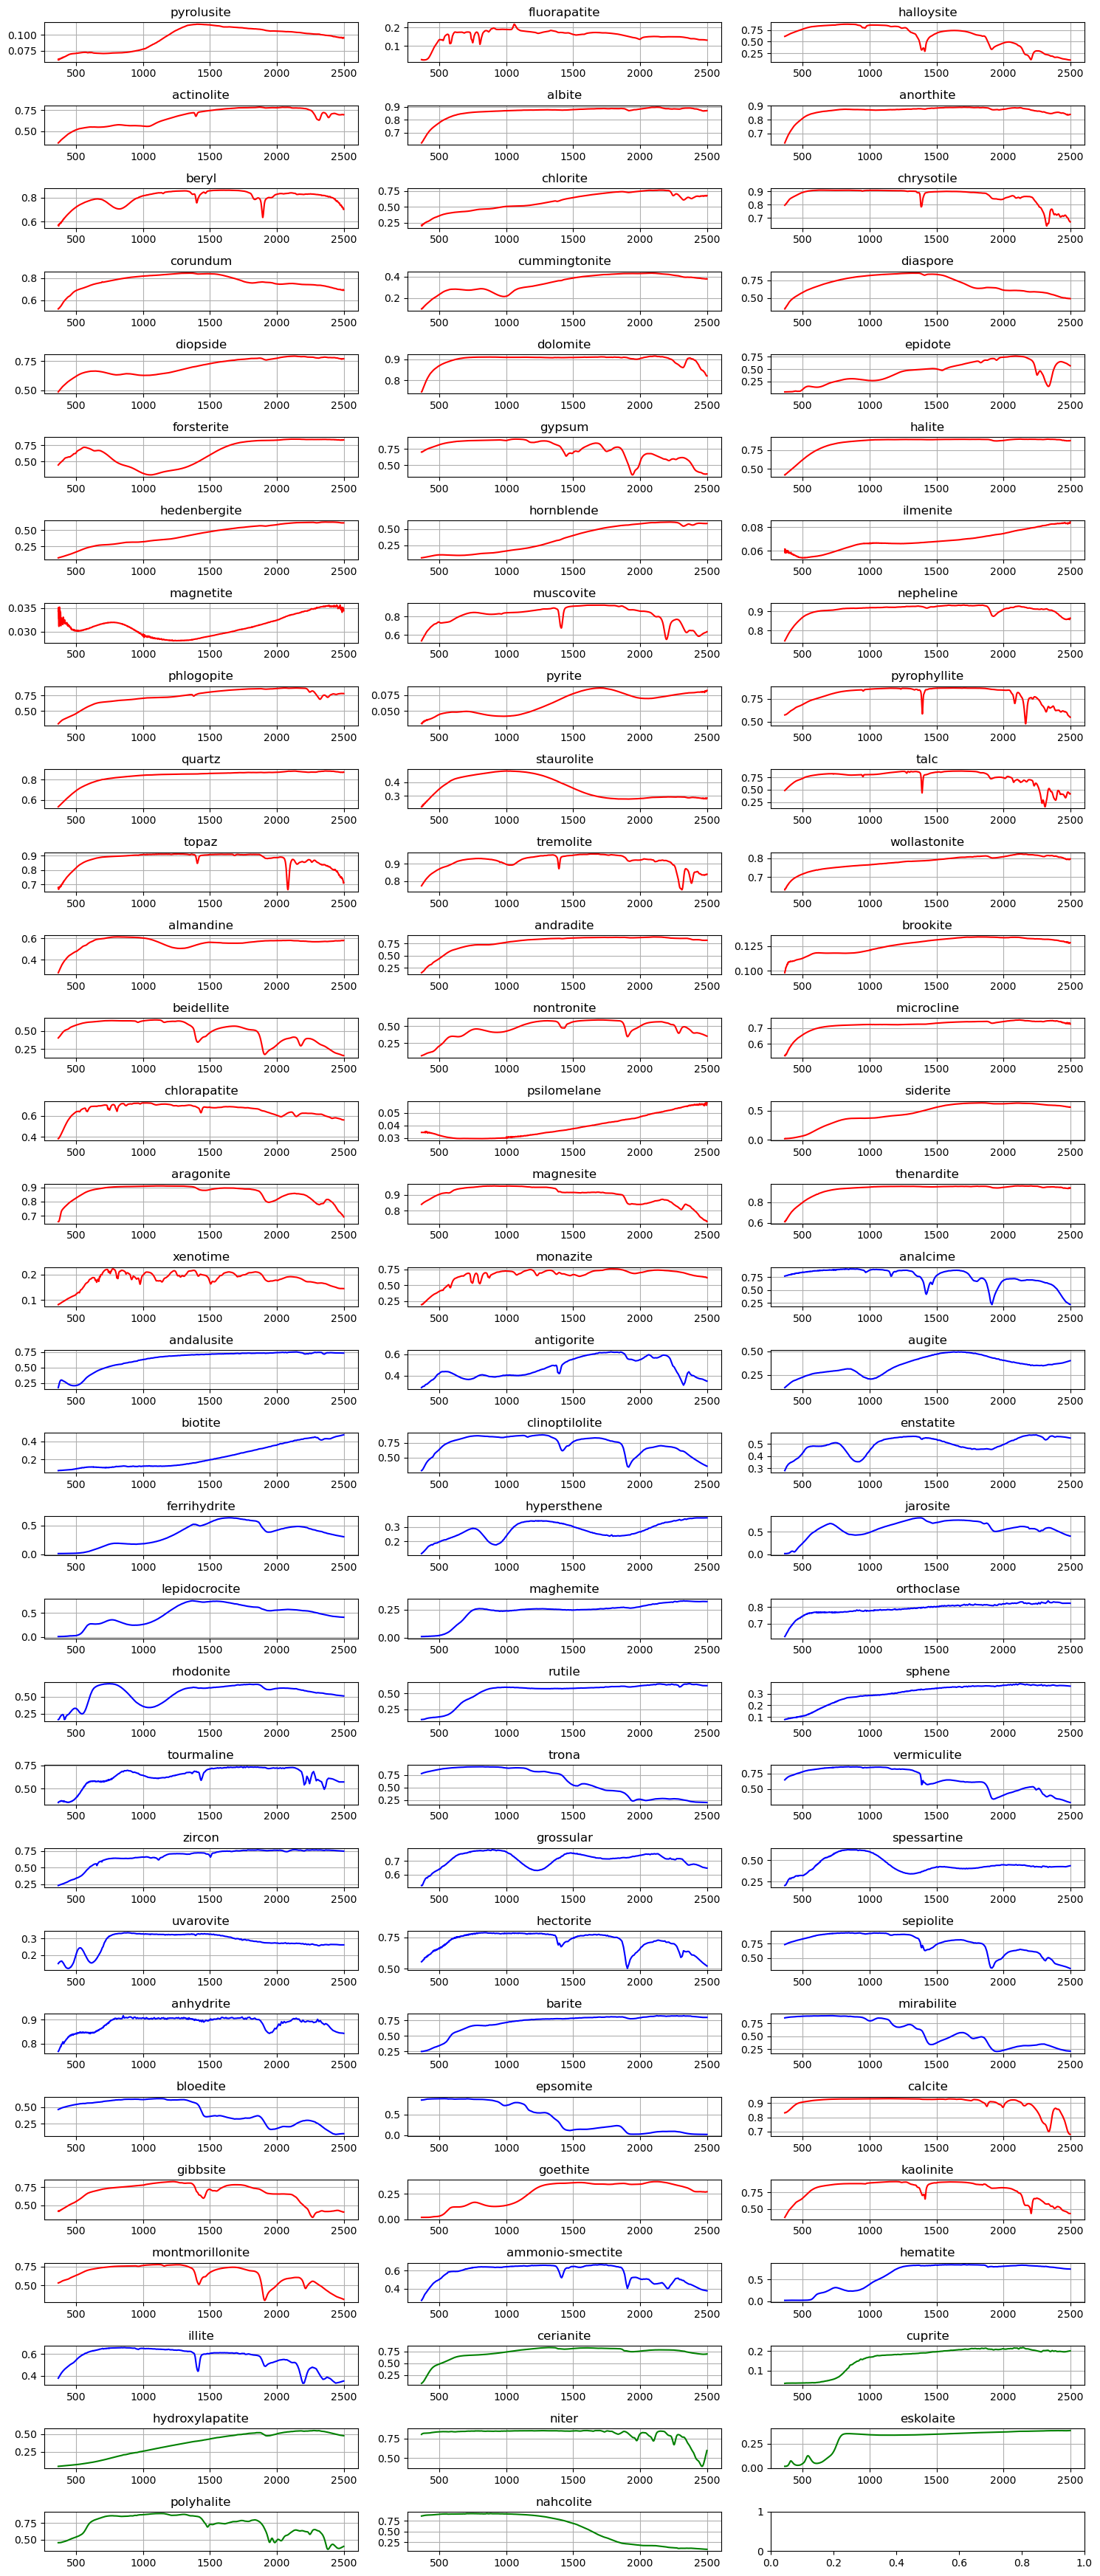

In [140]:
f, axarr = plt.subplots(int(np.ceil((len(endMemMap.keys())-1)/3.)),3,figsize=(15,35))

curr_row = 0
index = 0

for endMem in endMemMap.keys():
    if endMem == "General" : continue

    if "ASD wavelength" in endMemMap[endMem] :
        ttype="ASD"
        clr = "r"
    elif "BECK wavelength" in endMemMap[endMem] : 
        ttype = "BECK"
        clr = "b"
    else :
        ttype="second"
        clr = "g"
    
        
    #a = plt.plot(endMemMap[endMem][ttype+" wavelength"],endMemMap[endMem][ttype+" reflectance"])

    # find the column by taking the current index modulo 3
    col = index % 3
    # plot on relevant subplot
    axarr[curr_row,col].plot(endMemMap["General"]["Postprocessed Wavelength Axis [nm]"],endMemMap[endMem]["Postprocessed Reflectance"],clr)
    axarr[curr_row,col].set_title(endMem)
    axarr[curr_row,col].grid()
    
        
    # we have finished the current row, so increment row counter
    if col == 2 :
        curr_row += 1
    index +=1
    
    
f.tight_layout()
plt.show()

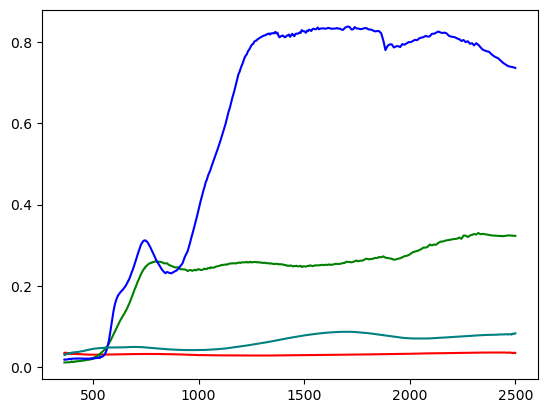

In [141]:
plt.plot(endMemMap["General"]["Postprocessed Wavelength Axis [nm]"],np.array(endMemMap["magnetite"]["Postprocessed Reflectance"]),'r')
plt.plot(endMemMap["General"]["Postprocessed Wavelength Axis [nm]"],endMemMap["maghemite"]["Postprocessed Reflectance"],'g')
plt.plot(endMemMap["General"]["Postprocessed Wavelength Axis [nm]"],endMemMap["hematite"]["Postprocessed Reflectance"],'b')
plt.plot(endMemMap["General"]["Postprocessed Wavelength Axis [nm]"],endMemMap["pyrite"]["Postprocessed Reflectance"],'teal')

In [147]:
print(len([x for x in endMemMap.keys() if endMemMap[x] is not None and "Postprocessed Reflectance" in endMemMap[x]]))

93


In [163]:
import torch

len(endMemMap)
Fnames = [x for x in endMemMap.keys() if x != "General" and "Postprocessed Reflectance" in endMemMap[x]]

FnamesFinal = [""] * (len(Fnames) + 1)
Fs = torch.zeros((len(Fnames) + 1,len(endMemMap["General"]["Postprocessed Wavelength Axis [nm]"])))
rhorads = torch.zeros((len(Fnames) + 1))

index = 0 
for endmember in Fnames :
    FnamesFinal[index] = endmember
    Fs[index,:] = torch.tensor(endMemMap[endmember]["Postprocessed Reflectance"])
    rhorads[index] = torch.tensor(endMemMap[endmember]["Density (Mg/m^3)"] * endMemMap[endmember]["Effective Radius (nm)"])
    index += 1

FnamesFinal[-1] = "soc"
endMemMap["General"]["Ordered endmember names"] = FnamesFinal

In [164]:
import json
with open('endmember spectral data.json', 'w', encoding='utf-8') as f:
    json.dump(endMemMap, f, ensure_ascii=False, indent=4)

(array([ 3.,  2.,  6., 11., 10.,  9.,  9.,  6.,  8.,  3.,  6.,  6.,  1.,
         3.,  2.,  2.,  2.,  1.,  1.,  1.]),
 array([0.68685746, 0.81398517, 0.94111288, 1.06824064, 1.19536829,
        1.32249594, 1.4496237 , 1.57675147, 1.70387912, 1.83100677,
        1.95813453, 2.0852623 , 2.21238995, 2.33951759, 2.46664524,
        2.59377313, 2.72090077, 2.84802842, 2.97515631, 3.10228395,
        3.2294116 ]),
 <BarContainer object of 20 artists>)

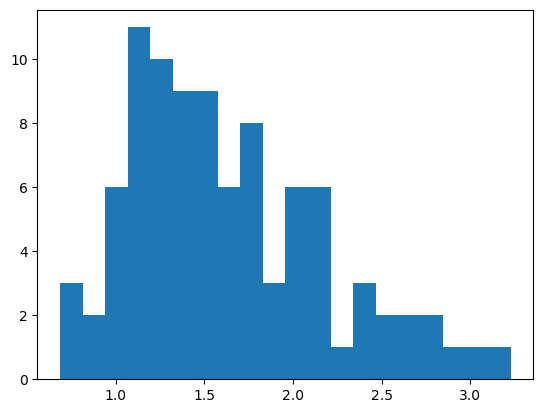

In [165]:
plt.hist(rhorads[:-1].numpy(),bins=20)  

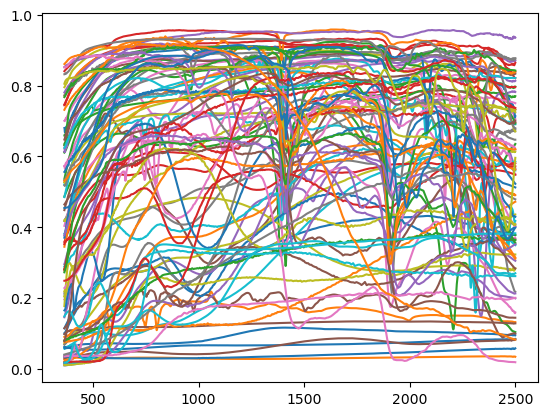

In [166]:
plt.plot(endMemMap["General"]["Postprocessed Wavelength Axis [nm]"],Fs[:-1,:].T.numpy());

In [168]:
import h5py

with h5py.File("ICLRDataset_USGSEndmemberSpectra.h5", 'w') as hUSGS :

    dsetInds = hUSGS.create_dataset(f'Fs', data=Fs) 
    dsetInds = hUSGS.create_dataset(f'rhorads', data=rhorads) 

